# This notebook integrates the 2 MUTANT samples

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import sys

In [5]:
sys.path.append("/home/lucy/")

In [6]:
import zc_function as zc

In [13]:
import anndata as ad

In [7]:
dat1 = sc.read("./new_sample_10868_filtered/10868_5.h5ad")
dat2 = sc.read("./new_sample_10868_filtered/11283_1_filtered.h5ad")

In [8]:
dat1.X.sum(axis = 1)

array([65981., 59557., 53141., ...,   887.,   885.,   883.], dtype=float32)

In [9]:
dat2.X.sum(axis = 1)

matrix([[145258.],
        [ 93168.],
        [ 90746.],
        ...,
        [  2627.],
        [  2611.],
        [  2605.]], dtype=float32)

In [10]:
dat1

AnnData object with n_obs × n_vars = 4505 × 23312
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'cell_type_old', 'cytotrace'
    var: 'Mitochondrial', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'cell_type_clusters', 'cell_type_colors', 'leiden', 'leiden_colors', 'neighbors', 'paneth', 'pca', 'sample_colors', 'treatment_colors', 'umap', 'unknown_clusters'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [12]:
dat2.obs['sample'] = ['11283_1' for i in dat2.obs.index]

In [14]:
cdat = ad.concat( [dat1, dat2] )

In [15]:
cdat.raw = cdat.copy()

In [16]:
cdat

AnnData object with n_obs × n_vars = 6530 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [17]:
zc.normalization( cdat)

AnnData object with n_obs × n_vars = 6530 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type'
    var: 'mean', 'std'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [18]:
zc.clustering(cdat)

/home/lucy/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


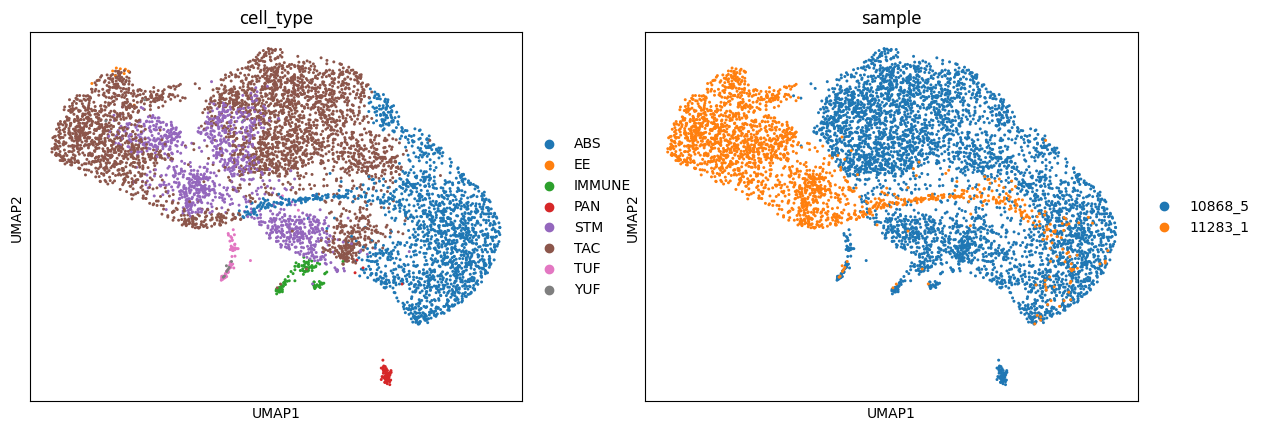

In [20]:
sc.pl.umap( cdat, color = ['cell_type', 'sample'] )